In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [297]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [298]:
cddf=pd.read_excel('CustomerDemographics.xlsx')
cddf

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [299]:
cbdf=pd.read_excel('CustomerBehaviorData.xlsx')
cbdf

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [300]:
ccdf=pd.read_excel('CreditConsumptionData.xlsx')
ccdf

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [301]:
ccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [302]:
cbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [303]:
cddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [304]:
ondf=pd.merge(ccdf,cbdf,on='ID', how='left')
ondf

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,12554,20014.0,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,2,40,24563.0,30051.32,12761.00,2,65,50836.0,Y,1674.09
1,17645,10173.0,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,2,78,23948.0,42119.05,76206.00,21,63,23226.0,Y,13043.34
2,7604,16095.0,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,2,82,10752.0,58373.25,75283.00,7,1,27036.0,Y,25375.27
3,1590,7707.0,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,23,38,12607.0,69851.51,68708.00,21,83,43037.0,Y,3544.33
4,16556,96408.0,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,24,50,25213.0,10071.00,80140.00,8,32,32044.0,NaN,12780.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [305]:
ondf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons                15000 non-null  float64
 2   cc_cons_apr            20000 non-null  float64
 3   dc_cons_apr            20000 non-null  float64
 4   cc_cons_may            19999 non-null  float64
 5   dc_cons_may            20000 non-null  float64
 6   cc_cons_jun            20000 non-null  float64
 7   dc_cons_jun            19999 non-null  float64
 8   cc_count_apr           19999 non-null  float64
 9   cc_count_may           20000 non-null  int64  
 10  cc_count_jun           20000 non-null  int64  
 11  dc_count_apr           20000 non-null  int64  
 12  dc_count_may           20000 non-null  int64  
 13  dc_count_jun           20000 non-null  int64  
 14  card_lim               20000 non-null  int64  
 15  pe

In [306]:
fdf=pd.merge(ondf,cddf, on ='ID',  how='left')
fdf

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [307]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [308]:
train_data=fdf.loc[0:14999]
test_data=fdf.loc[15000:]
test_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [309]:
def missing_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.fillna(x.median())
    elif ((x.dtype=='object') or (x.dtype=='O')):
        x = x.fillna(x.mode()[0])
    else:
        x
    return x

In [310]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [311]:
train_data= train_data.apply(missing_var)

In [312]:
train_data = train_data.apply(outlier_var)

In [313]:
print(train_data.account_type.value_counts())
print(train_data.gender.value_counts())
print(train_data.loan_enq.value_counts())
print(train_data.Income.value_counts())

current    12727
saving      2273
Name: account_type, dtype: int64
M    12945
F     2055
Name: gender, dtype: int64
Y    15000
Name: loan_enq, dtype: int64
MEDIUM    9612
LOW       4188
HIGH      1200
Name: Income, dtype: int64


In [314]:
train_data[["account_type", "gender", "loan_enq","Income"]]

,account_type,gender,loan_enq,Income
0,current,M,Y,MEDIUM
1,current,M,Y,HIGH
2,current,M,Y,MEDIUM
3,current,F,Y,MEDIUM
4,current,M,Y,MEDIUM
...,...,...,...,...
14995,current,F,Y,LOW
14996,current,M,Y,MEDIUM
14997,current,M,Y,MEDIUM
14998,current,M,Y,MEDIUM


In [315]:
train_data = pd.get_dummies(train_data,columns=['account_type','gender','loan_enq'],drop_first=True)

In [316]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_data['Income'] = lb.fit_transform(train_data['Income'])

In [317]:
y=train_data.cc_cons
x=train_data.drop(columns=["cc_cons"])
x

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_saving,gender_M
0,12554,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,10,...,1674.09,35,2,15.0,1,708.0,0,17.0,0,1
1,17645,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,13,...,13043.34,35,0,15.0,6,233.0,0,14.0,0,1
2,7604,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,102,...,25375.27,55,2,24.5,1,802.0,1,3.0,0,1
3,1590,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,50,...,3544.33,29,2,4.5,6,867.0,1,4.0,0,0
4,16556,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,82,...,12780.44,34,2,12.6,4,802.0,1,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,...,78966.76,53,1,13.2,9,653.0,1,20.0,0,0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,...,4762.10,44,2,2.4,9,535.0,1,2.0,0,1
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,...,2877.33,37,2,3.4,9,464.0,1,8.0,0,1
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,...,13006.84,220,2,40.0,10,536.0,1,3.0,0,1


In [318]:
power=PowerTransformer(method='yeo-johnson',standardize=True) # X-variable transformation
data_trans= power.fit_transform(x)
data_trans

C:\Users\Chinthana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 0.49622885,  0.82688421, -1.71568219, ...,  1.06256145,
        -0.42260701,  0.39843262],
       [ 1.23556817,  0.57676717, -1.0617475 , ...,  0.57226452,
        -0.42260701,  0.39843262],
       [-0.31337153, -0.48238434, -0.28883195, ..., -1.54599629,
        -0.42260701,  0.39843262],
       ...,
       [-1.42586178, -0.74706764, -1.07471356, ..., -0.49627684,
        -0.42260701,  0.39843262],
       [ 1.34189037,  2.30412154,  0.48569833, ..., -1.54599629,
        -0.42260701,  0.39843262],
       [-0.89224174, -0.25842502, -1.85545305, ..., -0.49627684,
        -0.42260701,  0.39843262]])

In [319]:
trans_x=pd.DataFrame(data_trans,columns=x.columns,index=x.index)

C:\Users\Chinthana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons_apr', ylabel='Density'>

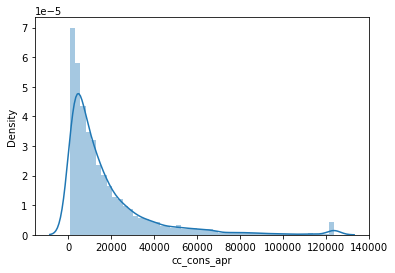

In [320]:
sns.distplot(x.cc_cons_apr)

C:\Users\Chinthana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons_apr', ylabel='Density'>

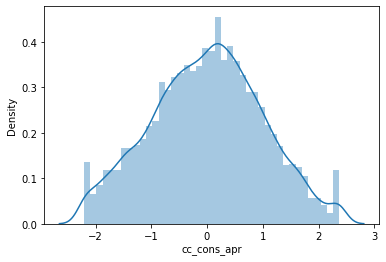

In [321]:
sns.distplot(trans_x.cc_cons_apr)

In [322]:
trans_y=np.log(y)

C:\Users\Chinthana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

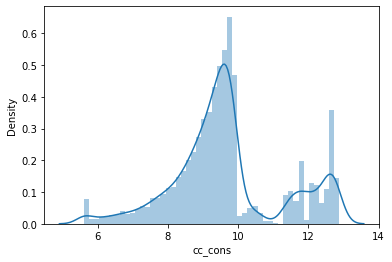

In [323]:
sns.distplot(trans_y)

C:\Users\Chinthana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

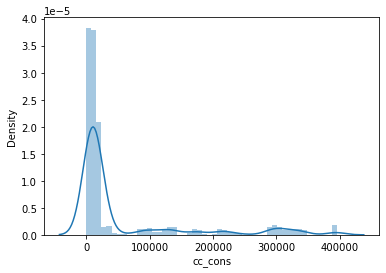

In [324]:
sns.distplot(y)

In [325]:
trans_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  float64
 1   cc_cons_apr                   15000 non-null  float64
 2   dc_cons_apr                   15000 non-null  float64
 3   cc_cons_may                   15000 non-null  float64
 4   dc_cons_may                   15000 non-null  float64
 5   cc_cons_jun                   15000 non-null  float64
 6   dc_cons_jun                   15000 non-null  float64
 7   cc_count_apr                  15000 non-null  float64
 8   cc_count_may                  15000 non-null  float64
 9   cc_count_jun                  15000 non-null  float64
 10  dc_count_apr                  15000 non-null  float64
 11  dc_count_may                  15000 non-null  float64
 12  dc_count_jun                  15000 non-null  float64
 13  c

In [326]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression, RFE, SelectKBest 

In [327]:
SKB = SelectKBest(f_regression,k=8).fit(trans_x,trans_y)
trans_x.columns[SKB.get_support()].values

C:\Users\Chinthana\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


array(['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction'], dtype=object)

In [328]:
trans_x1=trans_x[['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction']]

In [329]:
trans_x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_may                   15000 non-null  float64
 1   cc_count_may                  15000 non-null  float64
 2   investment_3                  15000 non-null  float64
 3   credit_amount_apr             15000 non-null  float64
 4   debit_count_apr               15000 non-null  float64
 5   max_credit_amount_jun         15000 non-null  float64
 6   Emp_Tenure_Years              15000 non-null  float64
 7   Avg_days_between_transaction  15000 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


# Splitting Data into train and test

In [330]:
tran_X, test_X, train_y, test_y = train_test_split(trans_x1, trans_y, test_size=0.2, random_state=1234)

In [331]:
from sklearn.preprocessing import minmax_scale ,StandardScaler # Applying standardscaler technic to standardize values

In [332]:
std = StandardScaler()
std = std.fit(train_X)

In [333]:
train_X_std =  pd.DataFrame(std.transform(train_X), columns = train_X.columns, index=train_X.index)
test_X_std =  pd.DataFrame(std.transform(test_X), columns = test_X.columns, index=test_X.index) #standardizing train and test.

In [386]:
test_X_std

,cc_cons_may,cc_count_may,investment_3,credit_amount_apr,debit_count_apr,max_credit_amount_jun,Emp_Tenure_Years,Avg_days_between_transaction
7914,-1.177766,-0.268111,1.028132,0.511898,-0.791183,-2.435953,-2.229130,1.067888
14559,0.627420,-0.058378,1.543206,-0.216112,-0.864879,-0.242782,0.780971,-0.307897
12046,0.026785,-1.050300,0.263406,1.048236,-0.375478,-0.879534,1.002400,-1.551266
11354,0.538155,-0.710111,-1.573581,-0.594816,1.104922,-0.386876,0.769956,0.906351
12729,1.028410,0.692477,0.805580,0.665472,-0.791183,-0.227786,-0.206920,-0.123384
...,...,...,...,...,...,...,...,...
8933,-1.077723,-1.050300,-1.068931,-0.749290,2.156342,-0.351187,0.119887,1.539178
3699,-0.825714,-1.381343,1.182154,-0.468894,1.104922,0.743228,-0.516621,1.539178
12477,0.949965,0.113585,-0.886027,2.937833,-1.467180,-0.061520,-1.296338,-0.497282
162,1.061439,-0.106643,0.603259,0.326714,1.067637,-0.510893,0.119887,-1.102728


In [335]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [336]:
#Performing grid search to identify the best values of tuning parameters

param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,70,80,90,100,110,120,130,138,139,140,141,142,143,150], 'weights': ['uniform', 'distance']}  # number of possible combinations: 20

knn_clf_grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, n_jobs =-1, verbose=True)

In [337]:
knn_clf_grid.fit(train_X_std,train_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 24,
                                         25, 26, 27, 28, 29, 30, 31, 32, ...],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [338]:
knn_clf_grid.best_params_

{'n_neighbors': 142, 'weights': 'uniform'}

In [339]:
knn_reg = KNeighborsRegressor(n_neighbors=142, weights='uniform', n_jobs=-1)
knn_reg = knn_reg.fit(train_X_std, train_y)

In [340]:
train_pred = knn_reg.predict(train_X)

In [341]:
test_pred = knn_reg.predict(test_X)

In [342]:
metrics.mean_absolute_percentage_error(train_y,train_pred)

0.12401709756226117

In [343]:
metrics.mean_absolute_percentage_error(train_y, train_pred)

0.12401709756226117

In [344]:
rmspe = (np.sqrt(np.mean(np.square((train_y - train_pred) / train_y)))) * 100
rmspe

18.002814154164877

In [345]:
rmspe1 = (np.sqrt(np.mean(np.square((test_y - test_pred) / test_y)))) * 100
rmspe1

17.413171102282412

# Linear Regression

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
estimate=LinearRegression()

In [347]:
rfecv1=RFECV(estimator=estimate,step=1,min_features_to_select=8,scoring="neg_mean_squared_error",cv=5,verbose=True,n_jobs=-1)

In [348]:
recurve=rfecv1.fit(trans_x,trans_y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

In [349]:
rfecv1.support_

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False])

In [350]:
trans_x.columns[recurve.get_support()].values

array(['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction'], dtype=object)

In [351]:
trans_x2=trans_x[['cc_cons_may', 'dc_cons_jun', 'cc_count_may', 'investment_3',
       'credit_amount_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction']]

In [352]:
train_X, test_X, train_y, test_y = train_test_split(trans_x2, trans_y, test_size=0.2, random_state=1234)

In [353]:
linear_reg=LinearRegression(n_jobs=-1)
linear_reg.fit(train_X,train_y) 
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

LinearRegression(n_jobs=-1)

In [354]:
train_pred = linear_reg.predict(train_X)

In [355]:
test_pred = linear_reg.predict(test_X)

In [356]:
metrics.mean_absolute_percentage_error(train_y,train_pred)

0.12422524833545891

In [357]:
metrics.mean_absolute_percentage_error(train_y,train_pred)

0.12422524833545891

In [358]:
RMSPE = (np.sqrt(np.mean(np.square((train_y - train_pred) / train_y)))) * 100
RMSPE

18.1101699757055

In [359]:
RMSPE1 = (np.sqrt(np.mean(np.square((test_y - test_pred) / test_y)))) * 100
RMSPE1

17.392045041660754

# XGBOOST

In [360]:
from xgboost import XGBRegressor

In [361]:
train_X, test_X, train_y, test_y = train_test_split(trans_x1, trans_y, test_size=0.3, random_state=1234)

In [362]:
xg_boost=XGBRegressor(random_state=123)
xg_boost.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [363]:
pred_train = xg_boost.predict(train_X)

In [364]:
pred_test = xg_boost.predict(test_X)

In [365]:
metrics.mean_absolute_percentage_error(train_y,pred_train)

0.08108766673410034

In [366]:
metrics.mean_absolute_percentage_error(test_y,pred_test)

0.13474584625316116

In [367]:
metrics.r2_score(test_y,pred_test)

-0.12679659121523534

# Predicting test Y values

In [368]:
test_data

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
15000,17591,NaN,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,...,1170.49,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
15001,13541,NaN,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,...,16447.45,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
15002,13431,NaN,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,...,2622.28,current,M,53,LOW,33.0,10,324.0,1,15.0
15003,8687,NaN,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,...,340.79,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
15004,14727,NaN,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,...,2812.20,current,M,62,LOW,12.6,9,505.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [369]:
test_data.drop(columns=["cc_cons"],inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6532\2726270996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns=["cc_cons"],inplace=True)


In [370]:
def missing_treat(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x = x.fillna(x.median())
    elif x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x
    return(x)

In [371]:
test_data = test_data.apply(missing_treat)

In [372]:
def outlier_var(x):
    if ((x.dtype=='float') or (x.dtype=='int')):
        x= x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    return x

In [373]:
test_data = test_data.apply(outlier_var)

In [374]:
test_data = pd.get_dummies(test_data, columns = ['account_type', 'loan_enq',"gender"], drop_first=True)

In [375]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [376]:
test_data["income"]=encode.fit_transform(test_data["Income"])
test_data=test_data.drop(columns=["Income"])

In [377]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(test_data)

C:\Users\Chinthana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [378]:
trans_test_x=pd.DataFrame(data_trans,columns=test_data.columns,index=test_data.index)

In [379]:
trans_test_x=trans_test_x[['cc_cons_may', 'cc_count_may', 'investment_3', 'credit_amount_apr',
       'debit_count_apr', 'max_credit_amount_jun', 'Emp_Tenure_Years',
       'Avg_days_between_transaction']]

In [380]:
pred = xg_boost.predict(trans_test_x)
pred

array([10.048797,  9.497321, 10.431784, ...,  9.507398,  8.875304,
        9.426859], dtype=float32)

In [381]:
pred_y=pd.DataFrame(pred)
y_pred=np.exp(pred_y)
y_pred.columns=['cc_cons']
y_pred.index=test_data.index
y_pred["ID"]=test_data.ID

In [382]:
y_pred

,cc_cons,ID
15000,23127.939453,17591
15001,13323.985352,13541
15002,33920.800781,13431
15003,19129.005859,8687
15004,11283.713867,14727
...,...,...
19995,35580.574219,12512
19996,19189.285156,14224
19997,13458.923828,18740
19998,7153.122070,18134


# Model Deployment

In [383]:
import pickle

In [384]:
pikle=open('regressor.pkl','wb')
pickle.dump(xg_boost,pikle)
pikle.close()